In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(rc={'figure.figsize':(8,5)})

# 1. Importing and Understanding the Dataset

In [2]:
emp_data = pd.read_csv("/content/Employee.csv")
emp_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [34]:
# Copy the dataset to a new variable for research purposes
data = emp_data.copy()

## 1.1 Analysing the basic information about the dataset

In [6]:
# Number of rows and columns
data.shape

(74498, 24)

In [8]:
# The summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [12]:
# Checking whether duplicate rows are found in the dataset
data.duplicated().sum()

0

In [119]:
# Null values in each column
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

* The proportion of null values present in the dataset compared to the the rows in the datset is negligible.
* Therefore the imputation will be done using Simple imputation rather than KNN Inputation.

In [9]:
# Number of unique value in all columns to find the unique column
data.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

* Employee ID contains unique values and must be removed before model creation.


In [13]:
# datatypes in the dataset by count
data.dtypes.value_counts()

object     16
int64       6
float64     2
Name: count, dtype: int64

* Twice the number of Catergorical features are present in the dataset with 16 columns when compared to 8 numeric columns(int64 = 6 and
float64 = 2).

# 2. Data Preprocessing. Part-1

## 2.1 Missing value imputation

* Using the simple imputation for performing EDA.

### 2.1.1 Analysing missing values

In [120]:
data.isnull().sum().sum()

40

In [4]:
num_df = data.select_dtypes(include=['int64','float64'])
num_df.head()
col_num=num_df.columns

In [5]:
cat_df = data.select_dtypes(include='object')
cat_df.head()

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,Male,Education,Excellent,Medium,Average,No,Associate Degree,Married,Mid,Medium,No,No,No,Excellent,Medium,Stayed
1,Female,Media,Poor,High,Low,No,Master’s Degree,Divorced,Mid,Medium,No,No,No,Fair,Low,Stayed
2,Female,Healthcare,Good,High,Low,No,Bachelor’s Degree,Married,Mid,Medium,No,No,No,Poor,Low,Stayed
3,Female,Education,Good,High,High,No,High School,Single,Mid,Small,Yes,No,No,Good,Medium,Stayed
4,Male,Education,Fair,Very High,Average,Yes,High School,Divorced,Senior,Medium,No,No,No,Fair,Medium,Stayed


In [123]:
num_df.isnull().sum()

Employee ID             0
Age                     0
Years at Company        0
Monthly Income          0
Number of Promotions    5
Distance from Home      0
Number of Dependents    6
Company Tenure          0
dtype: int64

In [47]:
col1 = ['Number of Promotions', 'Number of Dependents']
for i in col1:
  print(i,"-",round(data[i].skew(),2))

Number of Promotions - 0.99
Number of Dependents - 0.71


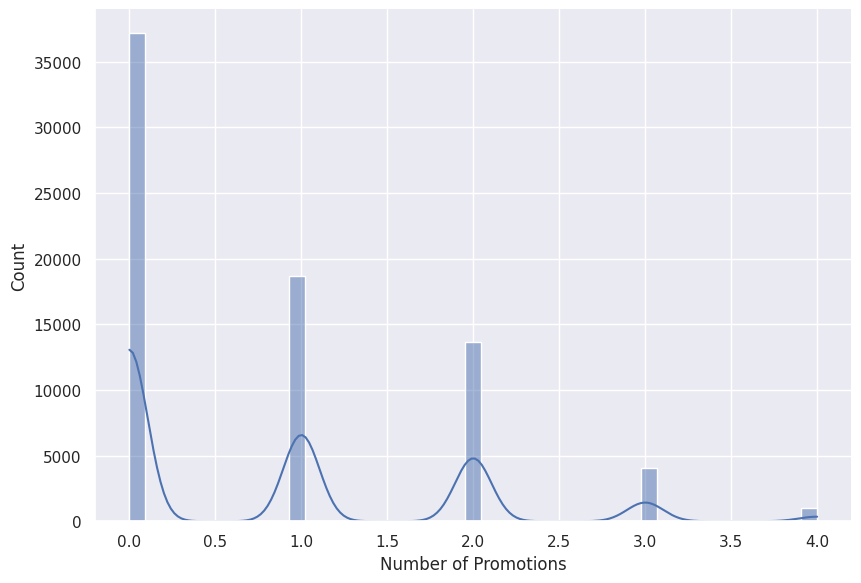

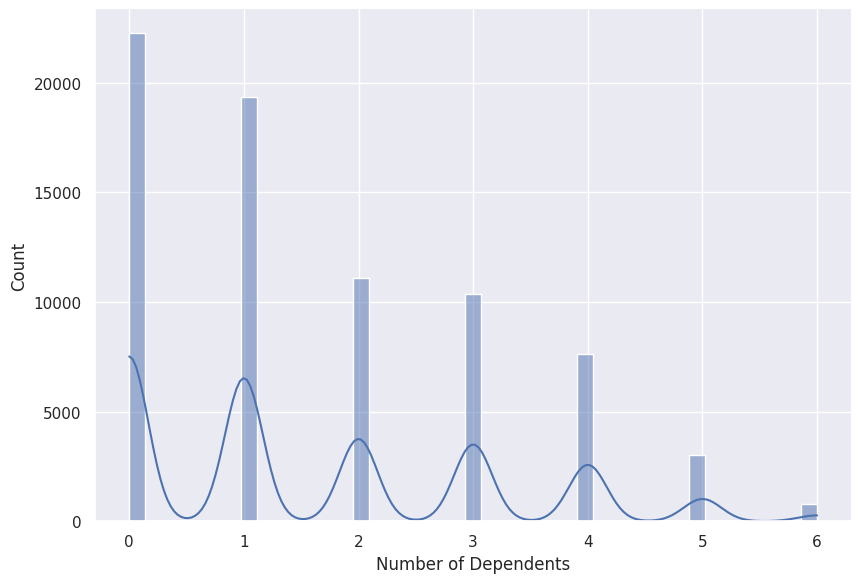

In [48]:
for columns in col1:
  sns.displot(data=data, x=columns, kde=True,height=6, aspect=11.7/8)

* As we can see both the columns are right skewed so **Median imputation** should be used

### 2.1.2 SImple Median Imputation

In [36]:
for column in col_num:
  data[column].fillna(data[column].median(), inplace = True)

### 2.1.3 Mode Imputation

In [37]:
col_cat=cat_df.columns
for column in col_cat:
  data[column].fillna(data[column].mode()[0], inplace = True)

In [8]:
# Checking for null values
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [53]:
col_num = num_df.columns
col_num

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')

## 2.2 Target Column Transformation

* Tranforming target column from catergorical to binary for exploratory data analysis

In [96]:
data['Attrition'].unique()

array(['Stayed', 'Left'], dtype=object)

In [35]:
data['Attrition'].replace({'Stayed':1,'Left':0},inplace=True)
data['Attrition'].unique()

array([1, 0])

# 3. Exploratory Data Analysis

## 3.1 Correlation Heatmap

<Axes: >

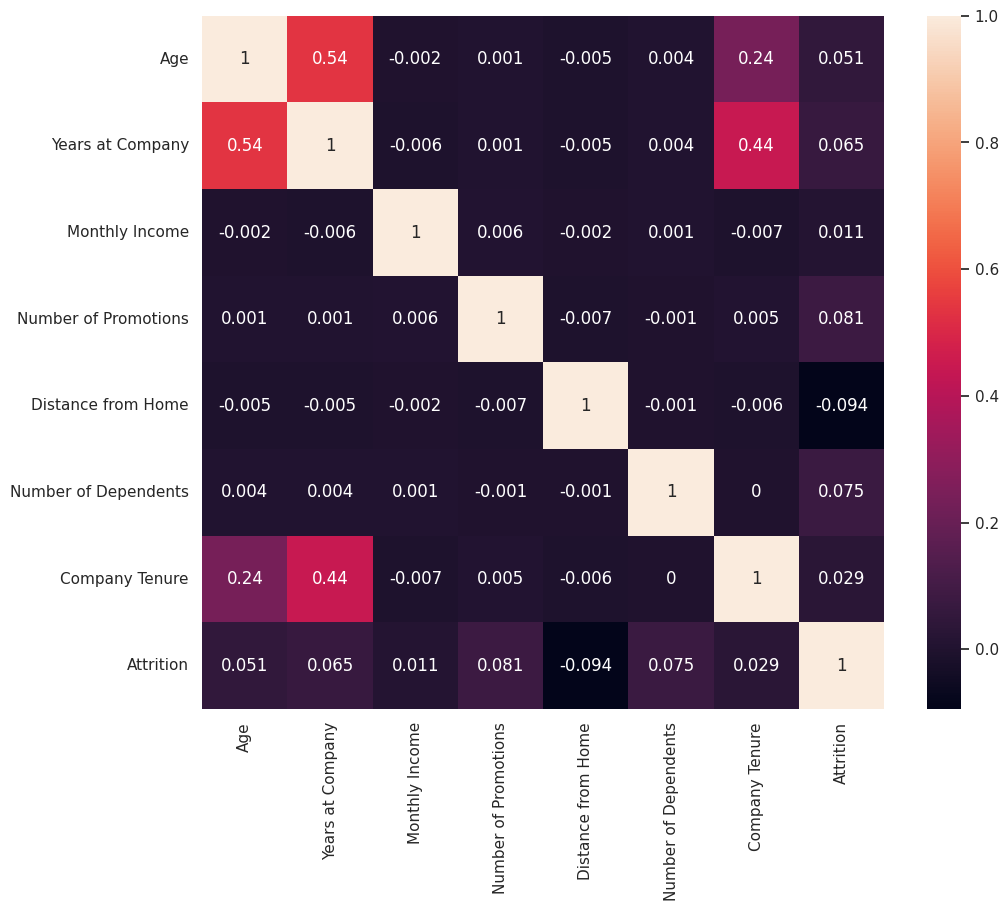

In [60]:
plt.figure(figsize=(11, 9))
data1=data.drop(columns='Employee ID')
df=round(data1.corr(numeric_only=True),3)
sns.heatmap(df, fmt='.2g', annot=True)

## Attrition

In [69]:
data["Attrition"].value_counts().reset_index()

,Attrition,count
0,1,39128
1,0,35370


<Axes: title={'center': 'Percentage wise distrubution of Attrition Rate'}, ylabel='count'>

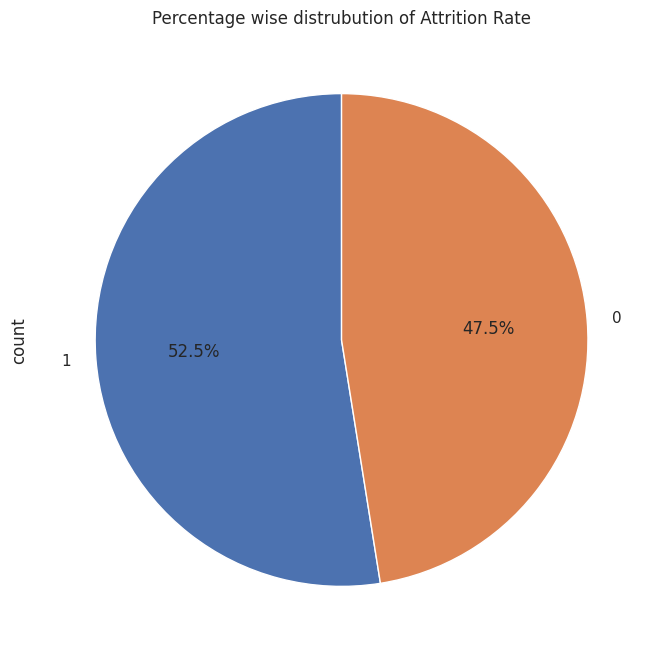

In [63]:
data["Attrition"].value_counts().plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, title='Percentage wise distrubution of Attrition Rate')

* As we can see there is almost an equal proportion of emloyees acheiving retention and attrition with **52.5%** and **47.5%** respectively.
* This is a worrying trend as the company only able to achieve retention for just above half of the work force.

## Age

### Distribution in terms of Age

In [70]:
data['Age'].nunique()

42

Text(0.5, 0.98, 'Employee count by Age')

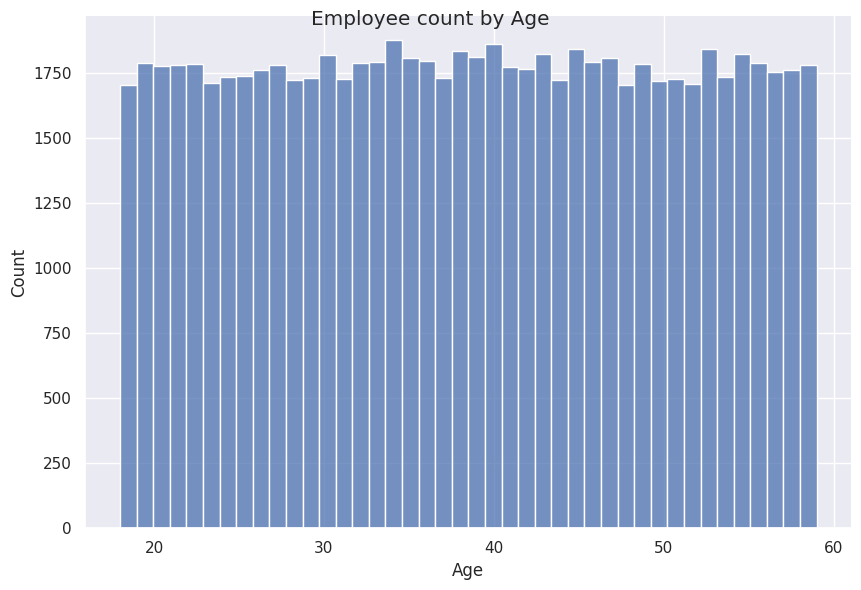

In [71]:
ax=sns.displot(data=data,x="Age",bins=42,height=6, aspect=11.7/8)
ax.figure.suptitle("Employee count by Age")

* Employees at the company are almost equally distributed along every age group

### Employee Attrition by Age

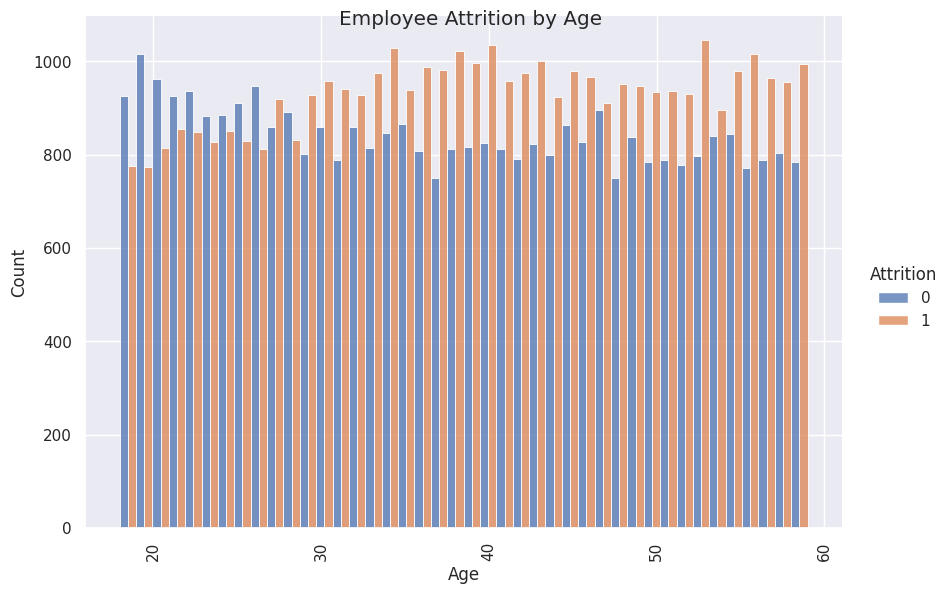

In [73]:
ax2=sns.displot(data=data,x="Age",bins=42,hue="Attrition", multiple='dodge',height=6, aspect=11.7/8)
ax2.tick_params(axis='x', rotation=90)
ax2.figure.suptitle("Employee Attrition by Age")
plt.show()

### Proportion of Employees Atrition vs Total Employees in an Age period

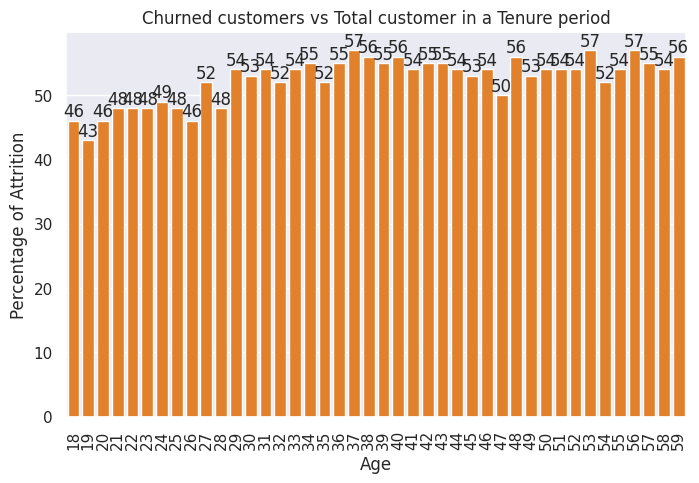

In [76]:
att_age=data.groupby(["Age"])['Attrition'].sum().reset_index()
Ten_total=data.groupby(["Age"])['Attrition'].count().reset_index()
att_age["Total Customers"]=Ten_total['Attrition']
att_age["Percentage of Attrition"]=round((att_age["Attrition"]/att_age["Total Customers"])*100,0)

ax5=sns.barplot(data=att_age,x='Age',y='Percentage of Attrition',color="#ff7f0e")
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Employees Atrition vs Total Employees in an Age period")
ax5.bar_label(ax5.containers[0])
plt.show()

* The attrition rate is partially lower for employees having lower years of age
* The Attrition percentage increases for upto a particular age group then remains the same.

# 4. Data Preprocessing. Part 2

## 4.1 Outliers

### 4.1.1 Percentage wise Outliers distribuations

* Perfectage wise proportion of outliers for each continuous numeric features

In [38]:
col_out = ['Age', 'Years at Company', 'Monthly Income','Distance from Home','Company Tenure']
outlier_info = {}

for col in col_out:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data)) * 100

    # Store the results
    outlier_info[col] = {
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': outlier_percentage
    }

# Display the outlier information
for col, info in outlier_info.items():
    print(f"{col}: {info['Number of Outliers']} outliers, {info['Percentage of Outliers']:.2f}%")

Age: 0 outliers, 0.00%
Years at Company: 338 outliers, 0.45%
Monthly Income: 65 outliers, 0.09%
Distance from Home: 0 outliers, 0.00%
Company Tenure: 0 outliers, 0.00%


### 4.1.2 Analysing outliers

In [39]:
df = data.copy()

class DataFrameOutlierDetector:
  def __init__(self, df):
    self.df = df

  def detect_outliers(self, column_name):

    Q1 = self.df[column_name].quantile(0.25)
    Q3 = self.df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)]

    outlier_df=pd.DataFrame(outliers)
    return outlier_df

  def outlier_describe(self, column_name):

    original_stats = self.df[column_name].describe()
    outlier = self.detect_outliers(column_name)
    non_outliers = self.df[~self.df.index.isin(outlier.index)]
    non_outlier_stats = non_outliers[column_name].describe()

    return pd.DataFrame({
        'with_outliers': original_stats,
        'without_outliers': non_outlier_stats
    })

  def plot_box(self, column_name):

    plt.figure(figsize=(6, 4))
    self.df.boxplot(column=column_name)
    plt.title(f'Box plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

detector = DataFrameOutlierDetector(df)

#### Years at Company

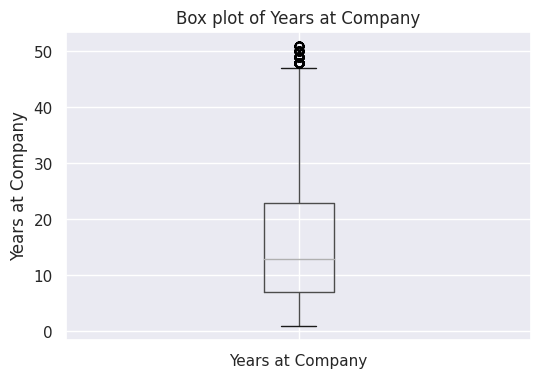

In [40]:
detector.plot_box('Years at Company')

In [41]:
detector.detect_outliers('Years at Company')

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
465,2745,58,Female,48,Technology,8460,Good,High,Average,0.0,...,1.0,Mid,Small,74,No,No,No,Poor,Medium,1
662,50335,57,Female,49,Education,5236,Fair,Very High,Average,0.0,...,2.0,Senior,Large,123,No,No,No,Poor,Low,1
843,53893,59,Male,49,Healthcare,8295,Good,Medium,Average,1.0,...,0.0,Senior,Large,124,Yes,No,No,Excellent,Low,1
1373,16371,56,Female,48,Media,5527,Good,High,Average,0.0,...,3.0,Mid,Medium,78,No,No,No,Fair,High,0
1567,51541,59,Female,48,Media,6411,Good,High,Average,1.0,...,0.0,Mid,Medium,117,No,No,Yes,Fair,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73109,30259,57,Female,48,Education,3641,Fair,Very High,Average,0.0,...,0.0,Entry,Small,103,No,No,No,Good,Medium,0
74041,262,57,Male,48,Technology,10852,Excellent,Medium,Below Average,0.0,...,1.0,Mid,Small,106,No,No,No,Poor,Low,0
74045,47213,59,Female,51,Healthcare,8448,Fair,Very High,Low,0.0,...,1.0,Mid,Small,87,No,No,Yes,Poor,High,0
74304,70133,56,Female,48,Technology,5876,Good,High,Low,2.0,...,5.0,Mid,Medium,57,No,No,Yes,Good,Low,0


#### Monthly Income

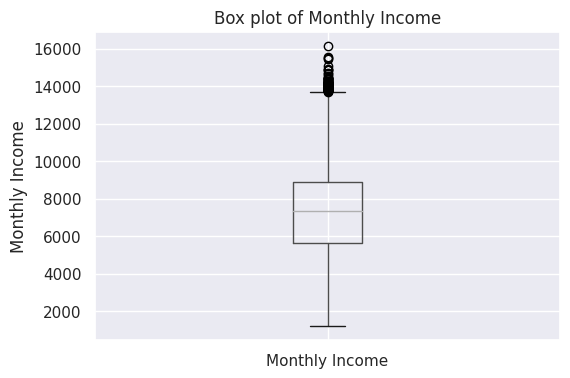

In [42]:
detector.plot_box('Monthly Income')

In [43]:
detector.detect_outliers('Monthly Income')

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
387,46092,24,Female,14,Finance,15495,Poor,Low,Average,2.0,...,4.0,Mid,Medium,73,No,No,No,Good,Low,0
1776,6468,40,Male,25,Technology,13961,Good,Medium,Below Average,2.0,...,6.0,Entry,Large,92,No,No,No,Good,Low,1
3521,71311,30,Male,15,Finance,14014,Fair,High,Average,0.0,...,3.0,Entry,Medium,75,No,No,No,Good,High,1
3609,49640,55,Male,9,Finance,14016,Good,High,Average,0.0,...,4.0,Entry,Medium,32,No,No,No,Poor,Low,0
8346,16017,27,Female,9,Technology,14176,Good,Medium,Average,3.0,...,0.0,Entry,Medium,66,No,Yes,No,Fair,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68241,62836,42,Male,14,Finance,14707,Fair,High,Average,1.0,...,0.0,Mid,Large,93,No,No,No,Fair,Very High,1
69990,44579,39,Male,4,Finance,14433,Fair,High,Average,2.0,...,0.0,Entry,Medium,66,Yes,No,No,Good,Low,0
71960,12284,24,Male,12,Technology,14028,Good,High,Average,3.0,...,2.0,Entry,Small,19,No,No,Yes,Good,Medium,1
72273,3283,59,Male,34,Finance,14547,Good,Medium,Average,1.0,...,3.0,Mid,Medium,98,Yes,No,No,Fair,High,0


#### Conclusion
* After analysing the outliers the conclusion is that they are genuine outliers and not typos or misrepresented values
* So they will be included in the training and testing model.
* Models that are not suseptable to outliers like tree based models and ensemble models will be used to create the Prediction model.

## 4.2 Encoding

### 4.2.1 Ordinal Encoding

In [16]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [10]:
# Finding each catergory in ordinal encoding columns
categorical_cols = ['Job Satisfaction', 'Work-Life Balance', 'Performance Rating','Education Level','Job Level','Company Size','Company Reputation','Employee Recognition']
for i in categorical_cols:
  print(i,"-",data[i].unique())

Job Satisfaction - ['Medium' 'High' 'Very High' 'Low']
Work-Life Balance - ['Excellent' 'Poor' 'Good' 'Fair']
Performance Rating - ['Average' 'Low' 'High' 'Below Average']
Education Level - ['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
Job Level - ['Mid' 'Senior' 'Entry']
Company Size - ['Medium' 'Small' 'Large']
Company Reputation - ['Excellent' 'Fair' 'Poor' 'Good']
Employee Recognition - ['Medium' 'Low' 'High' 'Very High']


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
categorical_cols = ['Job Satisfaction', 'Work-Life Balance', 'Performance Rating','Education Level','Job Level','Company Size','Company Reputation','Employee Recognition']
cats = [['Low','Medium', 'High', 'Very High' ], [ 'Poor', 'Fair','Good' ,'Excellent'],['Low', 'Below Average','Average','High'],
        ['High School','Associate Degree' , 'Bachelor’s Degree','Master’s Degree' , 'PhD'],['Entry','Mid', 'Senior'],['Small', 'Medium' ,'Large'],['Poor' ,'Fair','Good', 'Excellent'],
        [ 'Low','Medium', 'High', 'Very High']]

preprocessor = ColumnTransformer(
  transformers=[
    ('orlEncdr_with_map', Pipeline(steps=[('orlEnc_with_map', OrdinalEncoder(categories=cats))]), categorical_cols),
  ])

# Apply preprocessor to data
preprocessed_data = preprocessor.fit_transform(data)

preprocessed_data = pd.DataFrame(preprocessed_data,columns=categorical_cols)
preprocessed_data



,Job Satisfaction,Work-Life Balance,Performance Rating,Education Level,Job Level,Company Size,Company Reputation,Employee Recognition
0,1.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0
1,2.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,2.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0
3,2.0,2.0,3.0,0.0,1.0,0.0,2.0,1.0
4,3.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
74493,1.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0
74494,1.0,2.0,2.0,3.0,0.0,1.0,2.0,1.0
74495,3.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0
74496,2.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0


In [12]:
new_data = data.drop(columns=categorical_cols, axis=1)

# Concatenate the ordinal encoded dataframe with the original dataframe
data1 = pd.concat([new_data,preprocessed_data], axis=1)
data1 = pd.DataFrame(data1)
data1


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Number of Promotions,Overtime,Distance from Home,Marital Status,...,Innovation Opportunities,Attrition,Job Satisfaction,Work-Life Balance,Performance Rating,Education Level,Job Level,Company Size,Company Reputation,Employee Recognition
0,8410,31,Male,19,Education,5390,2.0,No,22,Married,...,No,1,1.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0
1,64756,59,Female,4,Media,5534,3.0,No,21,Divorced,...,No,1,2.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,30257,24,Female,10,Healthcare,8159,0.0,No,11,Married,...,No,1,2.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0
3,65791,36,Female,7,Education,3989,1.0,No,27,Single,...,No,1,2.0,2.0,3.0,0.0,1.0,0.0,2.0,1.0
4,65026,56,Male,41,Education,4821,0.0,Yes,71,Divorced,...,No,1,3.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,0.0,Yes,40,Single,...,No,1,1.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0
74494,47175,30,Female,15,Education,3856,2.0,Yes,45,Married,...,No,0,1.0,2.0,2.0,3.0,0.0,1.0,2.0,1.0
74495,12409,52,Male,5,Education,5654,0.0,No,4,Married,...,No,0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0
74496,9554,18,Male,4,Education,5276,0.0,No,13,Divorced,...,No,1,2.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0


### 4.2.2 One Hot Encoding

In [13]:
cat_col1=data1.select_dtypes(include='object').columns
cat_col1

Index(['Gender', 'Job Role', 'Overtime', 'Marital Status', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities'],
      dtype='object')

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded = encoder.fit_transform(data1[cat_col1])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_col1))

# Drop the original categorical columns from the dataset
data1 = data1.drop(columns=cat_col1, axis=1)

# Concatenate the one-hot encoded dataframe with the original dataframe
data2 = pd.concat([data1, one_hot_df], axis=1)
data2 = pd.DataFrame(data2)
data2

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition,Job Satisfaction,...,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Overtime_Yes,Marital Status_Married,Marital Status_Single,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes
0,8410,31,19,5390,2.0,22,0.0,89,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,64756,59,4,5534,3.0,21,3.0,21,1,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30257,24,10,8159,0.0,11,3.0,74,1,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,65791,36,7,3989,1.0,27,2.0,50,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,65026,56,41,4821,0.0,71,0.0,68,1,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,42,7830,0.0,40,0.0,60,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
74494,47175,30,15,3856,2.0,45,0.0,20,0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
74495,12409,52,5,5654,0.0,4,4.0,7,0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74496,9554,18,4,5276,0.0,13,3.0,5,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data2.select_dtypes(include='object').columns

Index([], dtype='object')

# 5. Feature Selection

## 5.1 Information Gain

In [21]:
from sklearn.feature_selection import mutual_info_classif

# Assuming `data` is your DataFrame containing the relevant columns
X = data2.drop(columns='Attrition',axis=1)
Y = data2['Attrition'].values  # Target variable
col=X.columns
# Calculate Information Gain for each feature
information_gains = mutual_info_classif(X, Y)

# Create a DataFrame to store the Information Gain values for each feature
information_gain_df = pd.DataFrame(information_gains,index=col ,columns=['Information Gain'])

# Sort features by Information Gain in descending order
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

# Display Information Gain values
print("Information Gain for each feature:")
print(information_gain_df)

Information Gain for each feature:
                              Information Gain
Job Level                             0.054680
Marital Status_Single                 0.041605
Marital Status_Married                0.034391
Remote Work_Yes                       0.026498
Work-Life Balance                     0.025575
Gender_Male                           0.015352
Number of Promotions                  0.012269
Company Reputation                    0.010571
Number of Dependents                  0.009639
Performance Rating                    0.008022
Education Level                       0.007867
Distance from Home                    0.006670
Employee Recognition                  0.005849
Job Satisfaction                      0.005663
Years at Company                      0.005522
Job Role_Technology                   0.004034
Company Tenure                        0.003221
Company Size                          0.002853
Age                                   0.001835
Job Role_Media           

In [25]:
final_data=data2[['Job Level','Marital Status_Married','Marital Status_Single','Remote Work_Yes','Work-Life Balance','Gender_Male',
                 'Number of Promotions','Company Reputation','Attrition']]
final_data.head()

,Job Level,Marital Status_Married,Marital Status_Single,Remote Work_Yes,Work-Life Balance,Gender_Male,Number of Promotions,Company Reputation,Attrition
0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,3.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1
2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1
3,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,1
4,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1


# 6. Model Building

## 6.1 Train test split

In [28]:
from sklearn.model_selection import train_test_split

X= final_data.drop(columns=['Attrition'])
y= final_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 6.2 Model Selection

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  'KNN': KNeighborsClassifier()
}

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1=model.predict(X_train)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred1)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print('*'*30)
    print(f'{name} Classifier:')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')

******************************
Decision Tree Classifier:
Train Accuracy: 0.7456
Test Accuracy: 0.7302
Precision: 0.7306
Recall: 0.7302
F1 Score: 0.7303

******************************
Random Forest Classifier:
Train Accuracy: 0.7456
Test Accuracy: 0.7327
Precision: 0.7327
Recall: 0.7327
F1 Score: 0.7327

******************************
XGBoost Classifier:
Train Accuracy: 0.7412
Test Accuracy: 0.7358
Precision: 0.7361
Recall: 0.7358
F1 Score: 0.7359

******************************
KNN Classifier:
Train Accuracy: 0.7145
Test Accuracy: 0.6974
Precision: 0.6974
Recall: 0.6974
F1 Score: 0.6974



## 6.3 Hyperparameter Tuning

### 6.3.1 GridsearchCV

#### XGBoost

In [33]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xg_param_grid = {
    'max_depth': [7,8,9],
    'learning_rate': [0.2,0.3,0.4],
    'n_estimators': [200, 400,500],
    'reg_alpha': [0.05,0.1, 0.5],
    'reg_lambda': [1, 1.5,2]
}

xg_grid_search = GridSearchCV(estimator=xgb, param_grid=xg_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
xg_grid_search.fit(X_train, y_train)
best_model = xg_grid_search.best_estimator_

print("Best Hyperparameters:", xg_grid_search.best_params_)
print("*"*50)
print("Best Accuracy Score:", round((xg_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

KeyboardInterrupt: 

* XGboost was taking more than 20 minutes to execute this
* Due to contraints of time decided to go with Decision Tree Classifier

#### Decision Tree

In [44]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4,6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
print("*"*50)
print("Best Accuracy Score:", round((grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'splitter': 'best'}
**************************************************
Best Accuracy Score: 73.37  %
Test Set Accuracy: 73.88  %
Precision: 73.93 %
Recall: 73.88 %
F1 Score: 73.8900 %
**************************************************
DecisionTreeClassifier(max_depth=8)


## 6.4 Joblib Import

In [47]:
import joblib
filename = 'dtclassifier.joblib'
joblib.dump(best_model, open(filename, 'wb'))
print(f"Model saved to {filename}")

Model saved to dtclassifier.joblib


In [48]:
filename = 'Encoder.joblib'
joblib.dump(encoder, open(filename, 'wb'))
print(f"Model saved to {filename}")

Model saved to Encoder.joblib
